#   Analyzing Super Bowls and TV Data 

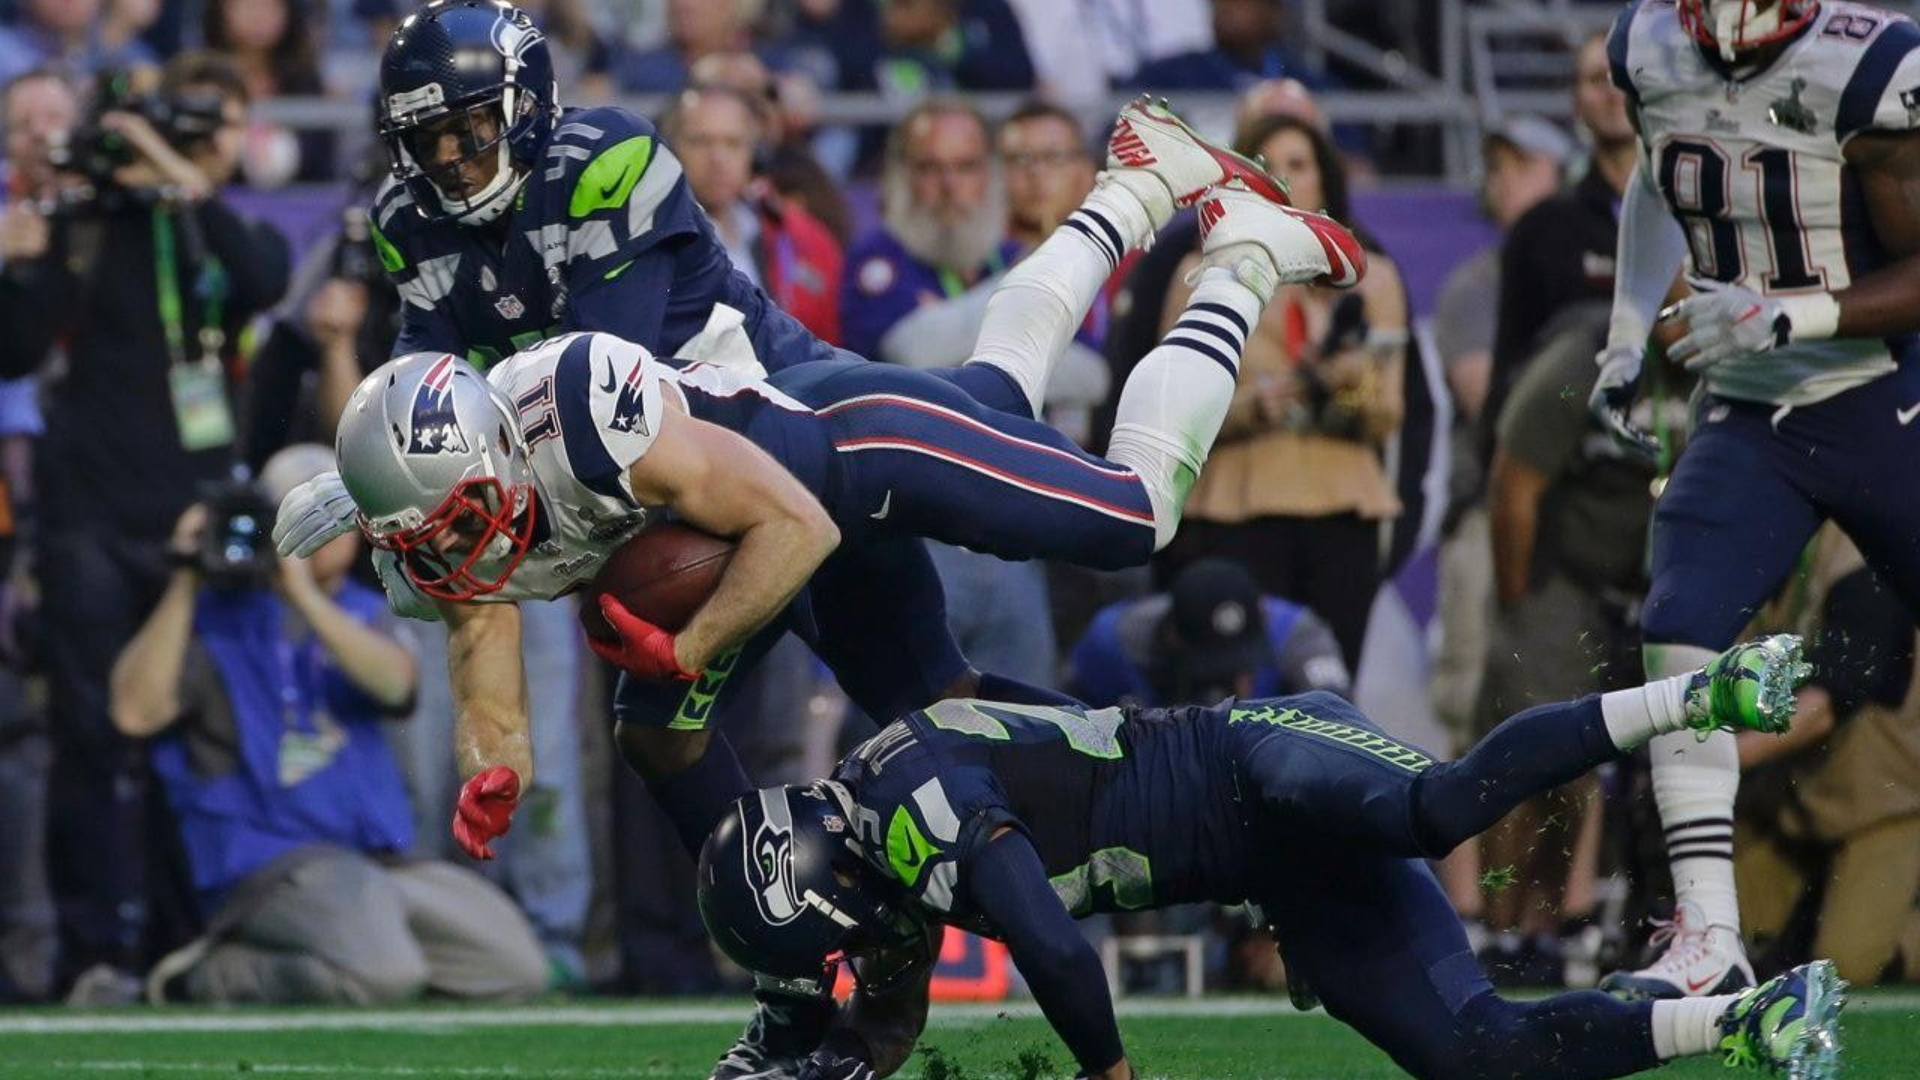

- In this project we have 3 datasets :
1. super_bowls which have the details about the super bowl games like the city that the game has been played and the winners and the losers and the points that every player scored and the name of their coaches.

2. tv which have the details about the channels(network) and viewers to watch the games and their ratings and the advertisment cost.

3. half-time musicians which have the details about the musics that have been played between the games.

- After exploring and cleaning our data a little, we're going to answer questions like:

1. What are the most extreme game outcomes?
2. How does the game affect television viewership?
3. How have viewership , attendance, TV ratings, and ad cost evolved over time?
4. Who are the most prolific musicians in terms of halftime show performances?
5. What is the city in which the most Super Bowl Games have been held?
6. Who are the most winners and losers in the history of this game?
7. Do the participants’ levels improve and are they able to achieve higher points when they win?

## 1. TV, halftime shows, and the Big Game

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
# Load the CSV data into DataFrames
super_bowls = pd.read_csv(r'E:\courses\Data Analysis\Python\projects\Analyzing TV Data/super_bowls.csv')
tv = pd.read_csv(r'E:\courses\Data Analysis\Python\projects\Analyzing TV Data/tv.csv')
halftime_musicians = pd.read_csv(r'E:\courses\Data Analysis\Python\projects\Analyzing TV Data/halftime_musicians.csv')

# super_bowls = super_bowls.sort_values("super_bowl",ascending=True)
# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


1. when we see the superbowls dataset we found that the qb_winner_2 and qb_loser_2 columns have missing values,so we know that the winner_1 and loser_1 played the entire game

2. in the tv dataset we found that we have a missing values in the total_us_viewers columns.

## 2. Taking note of dataset issues


In [4]:
super_bowls.info()
print(super_bowls.isna().sum())
# Summary of the TV data to inspect
tv.info()
print(tv.isna().sum())
print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()
print(halftime_musicians.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

In the tv dataset we have alot of missing values in many columns like : 
- total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast) about 38 missing values.

- rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast) about 38 missing values.
   
- share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast) about 47 missing values.
   
In the halftime musician dataset we have 46 missing values in the num_songs column   

## 3. Combined points distribution


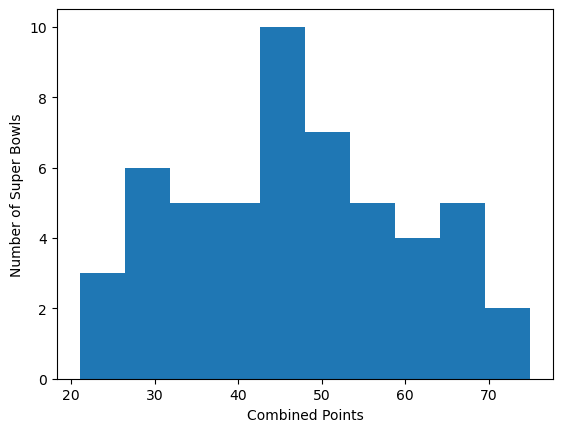

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [5]:
# # Import matplotlib and set plotting style
# plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(x=super_bowls["combined_pts"])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls["combined_pts"]< 25])

* Most combined scores are around 40-50 points.

* Going up to the highest combined scores at 74 and 75 :
- One even happened recently in 2018's Super Bowl 52 where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74 and difference points equal to 8.

- And the other happened in 1995's Super Bowl 29  where Stan Humphreys's Patriots lost to Steve Young' underdog Eagles 49-26 for a combined score of 75 and difference points equal to 23.

* Going down to the lowest combined scores at 22 , 21 and 23 : 
- These games happened in 1975 , 1973 and 1969 when Terry Bradshaw beat Fran Tarkenton for a combined score of 22 and difference points equal to 10 and so on.

## 4. Point difference distribution


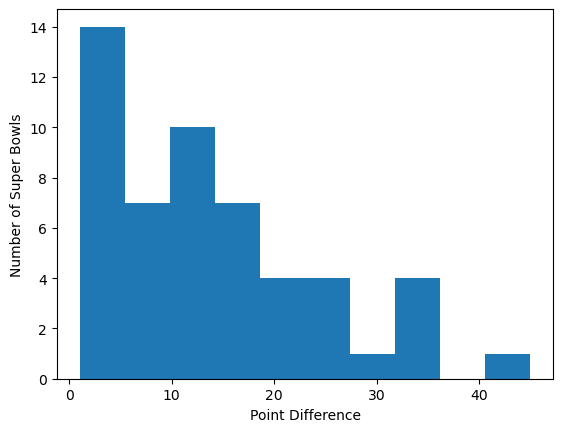

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [6]:
import numpy as np
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel("Number of Super Bowls")
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls["difference_pts"] == 1])
display(super_bowls[super_bowls["difference_pts"]>= 35])

- The vast majority of Super Bowls are close games.

- The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991.

- The biggest point discrepancy ever was 45 points (!) where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

- May be the big difference affected the viewership when the viewers watched the game and the game was boring .

## 5. Do blowouts translate to lost viewers?


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,25,ABC,79510000,NaN,41.9,63,NaN,NaN,800000,1991-01-27,...,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1
16,36,Fox,86801000,NaN,40.4,61,NaN,NaN,2200000,2002-02-03,...,Tom Brady,NaN,Bill Belichick,St. Louis Rams,17,Kurt Warner,NaN,Mike Martz,37,3
5,47,CBS,108693000,164100000.0,46.3,69,39.7,77.0,4000000,2013-02-03,...,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
47,5,NBC,46040000,NaN,39.9,75,NaN,NaN,72500,1971-01-17,...,Earl Morrall,Johnny Unitas,Don McCafferty,Dallas Cowboys,13,Craig Morton,NaN,Tom Landry,29,3
14,38,CBS,89795000,144400000.0,41.4,63,NaN,NaN,2302200,2004-02-01,...,Tom Brady,NaN,Bill Belichick,Carolina Panthers,29,Jake Delhomme,NaN,John Fox,61,3


<Axes: xlabel='difference_pts', ylabel='share_household'>

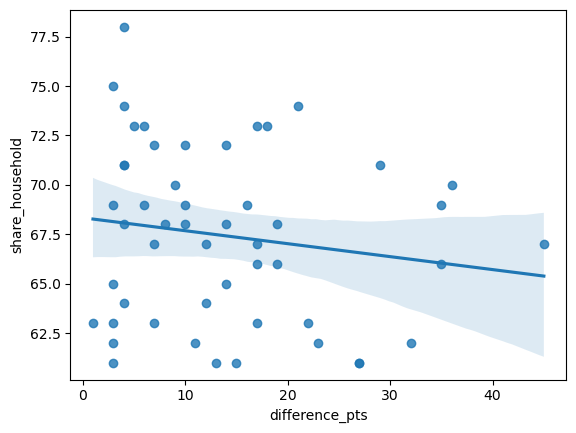

In [7]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
games_tv=games_tv.sort_values("difference_pts",ascending = True)
display(games_tv.head())

# Create a scatter plot with a linear regression model fit
sns.regplot(x= games_tv["difference_pts"], y= games_tv["share_household"], data=games_tv)

- From the regession plot we see that there is not relation between the difference points and share household but we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

- We will see if the advertisers affected the viewership

## 6. Viewership and the ad industry over time


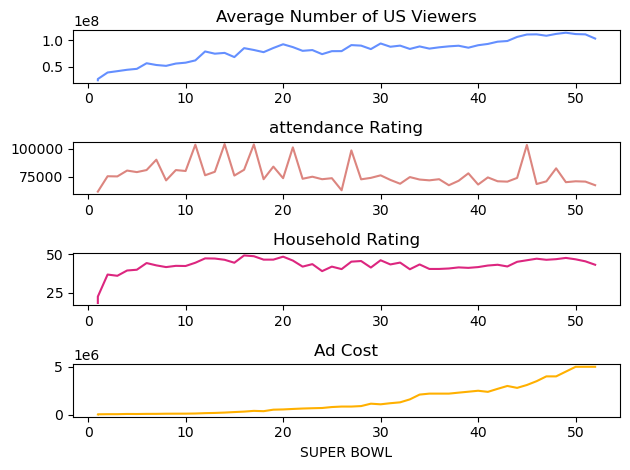

In [8]:
# Create a figure with 4x1 subplot and activate the top subplot
plt.subplot(4, 1, 1)
plt.plot(tv["super_bowl"], tv["avg_us_viewers"], color="#648FFF")
plt.title('Average Number of US Viewers')

# Activate the second subplot
plt.subplot(4, 1, 2)
plt.plot(super_bowls["super_bowl"],super_bowls["attendance"],color="#DC857F")
plt.title('attendance Rating')
          
# Activate the third subplot
plt.subplot(4, 1, 3)
plt.plot(tv["super_bowl"],tv["rating_household"],color="#DC267F")
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(4, 1, 4)
plt.plot(tv["super_bowl"],tv["ad_cost"],color="#FFB000")
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

We can see viewers increased before ad costs did.

## 7. Halftime shows weren't always this great


In [9]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians["super_bowl"]<=27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


- Let's see all of the musicians that have done more than one halftime show, including their performance counts.

## 8. Who has the most halftime show appearances?


In [10]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


The world famous Grambling State University Tiger Marching Band takes the crown with six appearances.
 
 From our previous inspections, the num_songs column has lots of missing values:
1. A lot of the marching bands don't have num_songs entries.
2. For non-marching bands, missing data starts occurring at Super Bowl XX.

## 9. Who performed the most songs in a halftime show?


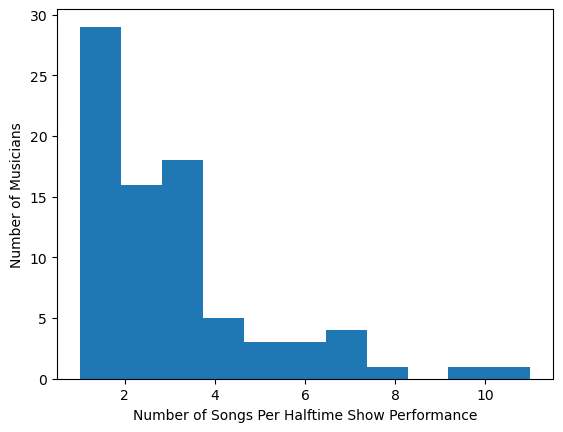

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [11]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians["musician"].str.contains('Marching')]
no_bands = no_bands[~no_bands["musician"].str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands["num_songs"].dropna(), bins=most_songs )
plt.xlabel("Number of Songs Per Halftime Show Performance")
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance.
no_bands = no_bands.sort_values('num_songs', ascending=False)
# display the top 15
display(no_bands.head(15))

- So most non-band musicians do 1-3 songs per halftime show.
- JT went off in 2018 about 11 songs. 
- Diana Ross comes in second with 10 in her medley in 1996.

## 10. The most hosted Cities for the Super Bowl Games

In [27]:
# Count occurrences of each city
city_counts = super_bowls['city'].value_counts().reset_index()

# Rename the columns for clarity
city_counts.columns = ['City', 'Number of Super Bowls']

# Create a bar plot using Plotly Express
fig = px.bar(city_counts, x='City', y='Number of Super Bowls', color='City', 
             title='Number of Super Bowls in Each City')
fig.show()

print(city_counts.head())

            City  Number of Super Bowls
0    New Orleans                     10
1          Miami                      5
2       Pasadena                      5
3  Miami Gardens                      5
4          Tampa                      4


- New Orieans city is the most city that hosted the Super Bowl games with big difference for other cities.

## 11. Number of Super Bowls for the Winners and Loser


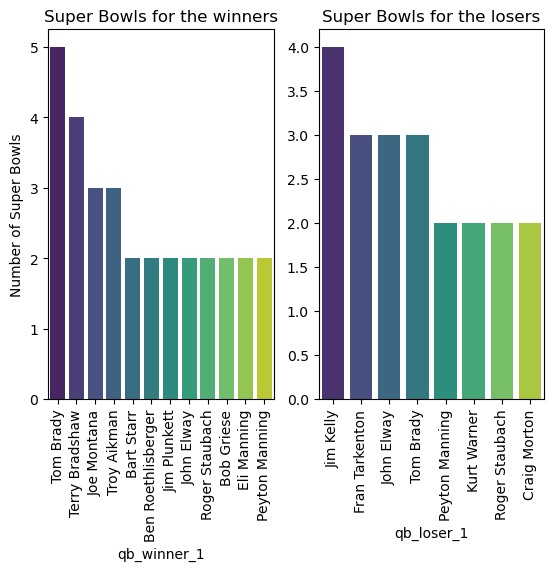

      qb_winner_1  Number of Super Bowls
0       Tom Brady                      5
1  Terry Bradshaw                      4
2     Joe Montana                      3
3     Troy Aikman                      3
4      Bart Starr                      2


       qb_loser_1  Number of Super Bowls
0       Jim Kelly                      4
1  Fran Tarkenton                      3
2      John Elway                      3
3       Tom Brady                      3
4  Peyton Manning                      2


In [25]:
# count the winner for super bowl games
winner_counts = super_bowls['qb_winner_1'].value_counts().reset_index()
# name the columns for the city_counts dataframe
winner_counts.columns = ['qb_winner_1', 'Number of Super Bowls']

# count the loser for super bowl games
loser_counts = super_bowls['qb_loser_1'].value_counts().reset_index()
# name the columns for the city_counts dataframe
loser_counts.columns = ['qb_loser_1', 'Number of Super Bowls']

# plot the winner who won the super bowl games more than one time
plt.subplot(1,2,1)
sns.barplot(data = winner_counts[winner_counts["Number of Super Bowls"]>1], x ="qb_winner_1", y="Number of Super Bowls" , palette ="viridis")
plt.xticks(rotation = 90)
plt.title("Super Bowls for the winners")

# plot the loser who lost the super bowl games more than one time
plt.subplot(1,2,2)
sns.barplot(data = loser_counts[loser_counts["Number of Super Bowls"]>1], x ="qb_loser_1", y="Number of Super Bowls" , palette ="viridis")
plt.ylabel('')
plt.title("Super Bowls for the losers")
plt.xticks(rotation = 90)
plt.show()

print(winner_counts.head())
print("\n")
print(loser_counts.head())

- Tom Brady is the person who has won the most Super Bowl games 
- Jim Kelly is the person who has lost the most Super Bowl games 

##  12. Number of Super Bowls for the Team Winners and Team Losers

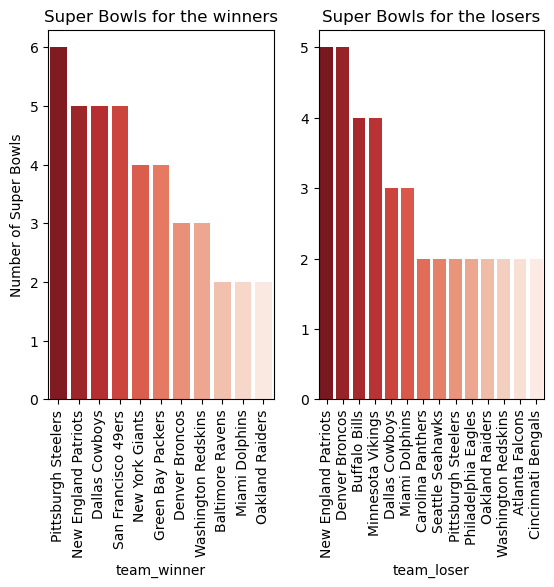

            team_winner  Number of Super Bowls
0   Pittsburgh Steelers                      6
1  New England Patriots                      5
2        Dallas Cowboys                      5
3   San Francisco 49ers                      5
4       New York Giants                      4


             team_loser  Number of Super Bowls
0  New England Patriots                      5
1        Denver Broncos                      5
2         Buffalo Bills                      4
3     Minnesota Vikings                      4
4        Dallas Cowboys                      3


In [24]:
# count the Team Winner for super bowl games
TeamWinner_counts = super_bowls['team_winner'].value_counts().reset_index()
# name the columns for the Team Winner_counts dataframe
TeamWinner_counts.columns = ['team_winner', 'Number of Super Bowls']

# count the Team Loser for super bowl games
TeamLoser_counts = super_bowls['team_loser'].value_counts().reset_index()
# name the columns for the city_counts dataframe
TeamLoser_counts.columns = ['team_loser', 'Number of Super Bowls']

# plot the Team Winner who won the super bowl games more than one time
plt.subplot(1,2,1)
sns.barplot(data = TeamWinner_counts[TeamWinner_counts["Number of Super Bowls"]>1], x ="team_winner", y="Number of Super Bowls" , palette ="Reds_r")
plt.xticks(rotation = 90)
plt.title("Super Bowls for the winners")

# plot the Team Loser who lost the super bowl games more than one time
plt.subplot(1,2,2)
sns.barplot(data = TeamLoser_counts[TeamLoser_counts["Number of Super Bowls"]>1], x ="team_loser", y="Number of Super Bowls" , palette ="Reds_r")
plt.ylabel('')
plt.title("Super Bowls for the losers")
plt.xticks(rotation = 90)
plt.show()

print(TeamWinner_counts.head())
print("\n")
print(TeamLoser_counts.head())

- Pittsburgh Steelers is the team that won the most Super games
- New England Patriots is the team that lost the most Super Bowl games

## 13. winning points for each Super Bowl games 

In [21]:
fig2 = px.line(super_bowls,x="super_bowl",y= "winning_pts",title="Winning points for each Super Bowl games")
fig2.show()

In this plot we need to know if Do the participants’ levels improve and are they able to achieve higher points when they win? 

But from this relationship we find that this is not necessary

##  14. Conclusion 

- In this notebook:
1. We loaded 3 datasets super_bowls, tv and half_time musicians and understand the Data.
2. We cleaned the datasets from the missing values.
3. Then explored Super Bowl game, television, and halftime show data.
4. We visualized the distributions of combined points, point differences, halftime show performances using histograms and the winners, team winners ,the losers and the team loser for the super bowl games.
5. We used line plots to see how ad cost increases lagged behind viewership increases. And we discovered that blowouts do appear to lead to a drop in viewers.

- Project Steps :
1. Understand the Data and ask questions that will be answered through this analysis.
2. Data Cleaning 
3. Exploratory Data Analysis.
4. Data Visualization.
6. Document Key insights.

### key insights :

* Most combined scores are around 40-50 points.

* Going up to the highest combined scores at 74 and 75 :
- One even happened recently in 2018's Super Bowl 52 where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74 and difference points equal to 8.

- And the other happened in 1995's Super Bowl 29  where Stan Humphreys's Patriots lost to Steve Young' underdog Eagles 49-26 for a combined score of 75 and difference points equal to 23.

* Going down to the lowest combined scores at 22 , 21 and 23 : 
- These games happened in 1975 , 1973 and 1969 when Terry Bradshaw beat Fran Tarkenton for a combined score of 22 and difference points equal to 10 and so on.

- The vast majority of Super Bowls are close games.

- The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991.

- The biggest point discrepancy ever was 45 points (!) where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

- May be the big difference affected the viewership when the viewers watched the game and the game was boring .

- From the regession plot we see that there is not relation between the difference points and share household but we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

- We will see if the advertisers affected the viewership

- We can see viewers increased before ad costs did.

- Let's see all of the musicians that have done more than one halftime show, including their performance counts.

- The world famous Grambling State University Tiger Marching Band takes the crown with six appearances.

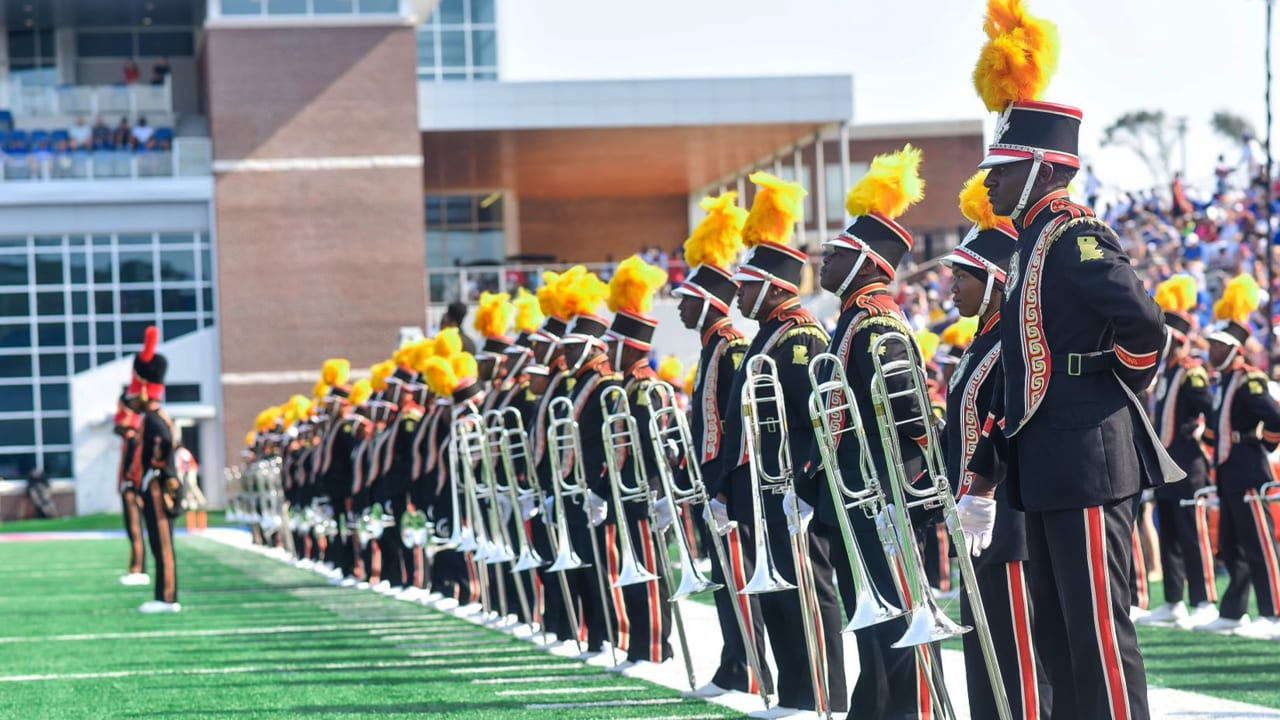


- So most non-band musicians do 1-3 songs per halftime show.
- JT went off in 2018 about 11 songs. 
- Diana Ross comes in second with 10 in her medley in 1996.

- New Orieans city is the most city that hosted the Super Bowl games with big difference for other cities.

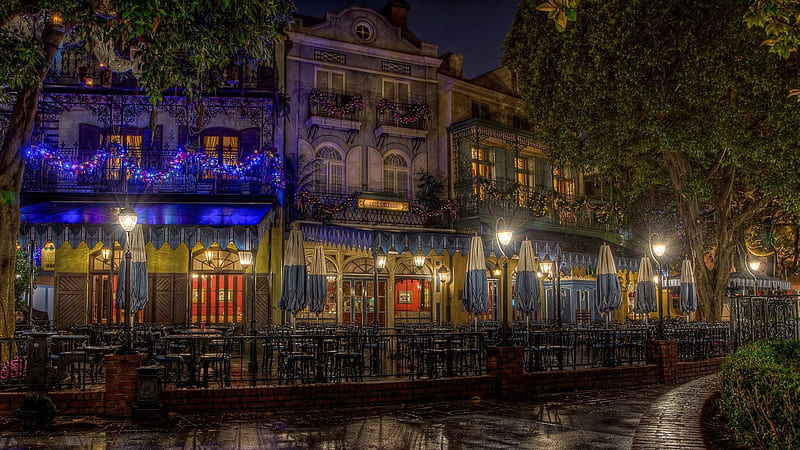

- Tom Brady is the person who has won the most Super Bowl games.
- Jim Kelly is the person who has lost the most Super Bowl games.

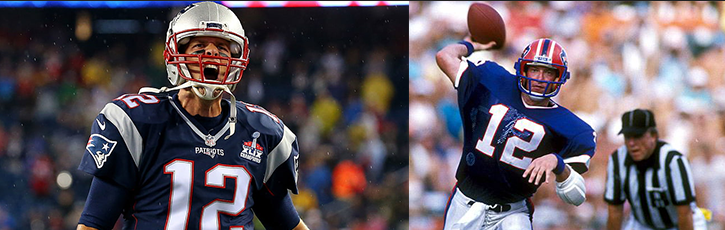

- Pittsburgh Steelers is the team that won the most Super games.
- New England Patriots is the team that lost the most Super Bowl game.

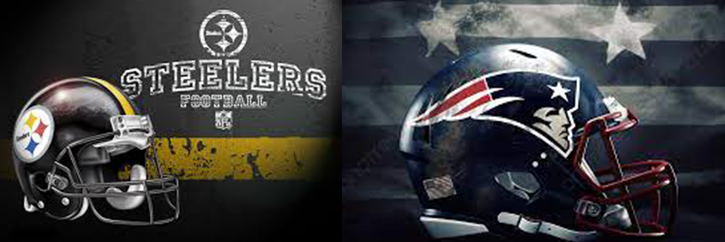
